# 8 setup
Import datasets/display example for first part

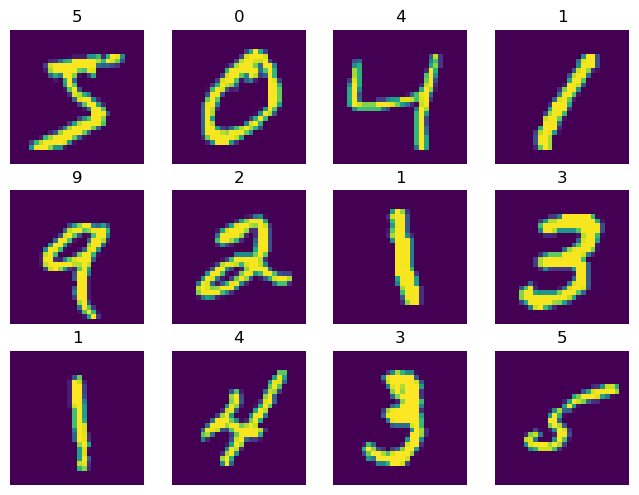

In [1]:
from tensorflow.keras import datasets as kds

import matplotlib.pyplot as plt


def plot_digit(image_array, title):
    image = image_array.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.title(title)


(images, labels), (test_images, test_labels) = kds.mnist.load_data()
images, test_images = images.reshape((60000, 28, 28, 1)), test_images.reshape(
    (10000, 28, 28, 1)
)

images, test_images = (
    images.astype("float32") / 255,
    test_images.astype("float32") / 255,
)

plt.figure(figsize=(8, 8))
for idx, (image, label) in enumerate(zip(images[:12], labels[:12])):
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(label)
    ax.set_facecolor("white")
plt.show()

# 8.1 Introduction to convnets

Convnets take input tensors of shape (img_height, img_width, img_channels). The main difference between dense layers and convolition layers is that dense layers learn global patterns and conv layers learn local patterns.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Clear old model
keras.backend.clear_session()

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

display(model.summary())

model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(images, labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

None

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8665 - loss: 0.4209 - val_accuracy: 0.9756 - val_loss: 0.0792
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9768 - val_loss: 0.0783
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9882 - val_loss: 0.0436
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.9882 - val_loss: 0.0420
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9895 - val_loss: 0.0434
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0381
Test accuracy: 0.991


# 8.2 Training a covnet from scratch on a small dataset.
Downloading the data

12470 12491


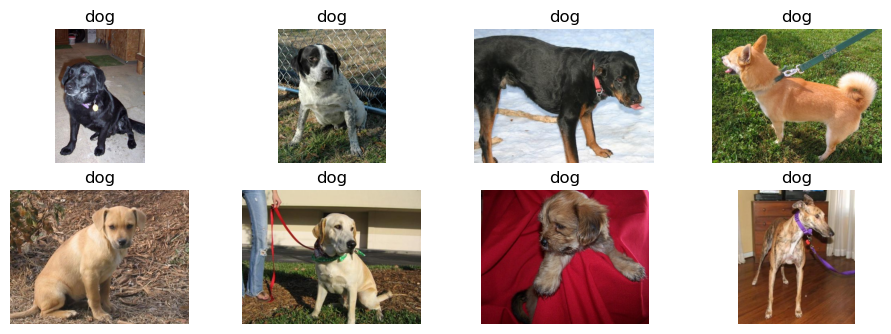

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

dog_files = os.listdir("./data/PetImages/Dog")
cat_files = os.listdir("./data/PetImages/Cat")
print(len(dog_files), len(cat_files))

# Plot first few images
plt.figure(figsize=(12, 8))
for idx, picture_path in enumerate(dog_files[:8]):
    ax = plt.subplot(4, 4, idx + 1)

    # Construct full path to image file
    full_path = f"./data/PetImages/Dog/{picture_path}"

    # Check if file exists
    if not os.path.isfile(full_path):
        print(f"File not found: {full_path}")
        continue

    pic_bgr_arr = cv2.imread(full_path)

    # Check if the image was loaded successfully
    if pic_bgr_arr is None:
        print(f"Failed to load image: {full_path}")
        continue

    pic_rgb_arr = cv2.cvtColor(pic_bgr_arr, cv2.COLOR_BGR2RGB)
    plt.imshow(pic_rgb_arr)
    plt.axis("off")
    plt.title("dog")
    ax.set_facecolor("white")

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.show()

In [12]:
import shutil
import random

# Define the source and target directories
source_dir_dogs = "./data/PetImages/Dog"
source_dir_cats = "./data/PetImages/Cat"
target_base_dir = "./data/cats_vs_dogs_small"

# Define the target directories for train, validation, and test sets
target_dirs = {
    "train": {
        "cat": os.path.join(target_base_dir, "train/cat"),
        "dog": os.path.join(target_base_dir, "train/dog"),
    },
    "validation": {
        "cat": os.path.join(target_base_dir, "validation/cat"),
        "dog": os.path.join(target_base_dir, "validation/dog"),
    },
    "test": {
        "cat": os.path.join(target_base_dir, "test/cat"),
        "dog": os.path.join(target_base_dir, "test/dog"),
    },
}

for phase in target_dirs:
    for category in target_dirs[phase]:
        os.makedirs(target_dirs[phase][category], exist_ok=True)


def copy_images(source_dir, target_dir, num_images):
    all_images = os.listdir(source_dir)
    random.shuffle(all_images)
    selected_images = all_images[:num_images]
    for image in selected_images:
        src_path = os.path.join(source_dir, image)
        dst_path = os.path.join(target_dir, image)
        shutil.copyfile(src_path, dst_path)


# Copy images to train set
copy_images(source_dir_cats, target_dirs["train"]["cat"], 1000)
copy_images(source_dir_dogs, target_dirs["train"]["dog"], 1000)

# Copy images to validation set
copy_images(source_dir_cats, target_dirs["validation"]["cat"], 500)
copy_images(source_dir_dogs, target_dirs["validation"]["dog"], 500)

# Copy images to test set
copy_images(source_dir_cats, target_dirs["test"]["cat"], 1000)
copy_images(source_dir_dogs, target_dirs["test"]["dog"], 1000)

print("Dataset creation complete.")

Dataset creation complete.


## 8.2.3 Building the model
We reuse the same general structure as our first example. The covnet will be a stack of altered conv2 and max pooling layers.

In [20]:
# Clear old model
keras.backend.clear_session()

# Create arbitrary input
inputs = keras.Input(shape=(180, 180, 3))

# Rescale images to be from 0-255
x = layers.Rescaling(1.0 / 255)(inputs)

# create 2d conv layer + max pooling
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

# 8.2.4 Data preprocessing
Use tensorflows data api

In [25]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("./data/cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=(180, 180), batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=(180, 180), batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=(180, 180), batch_size=32
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss"
    )
]
history = model.fit(
    train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks
)

Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.5121 - loss: 0.7721 - val_accuracy: 0.5100 - val_loss: 0.6910
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.5123 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.8952
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.5777 - loss: 0.6921 - val_accuracy: 0.6350 - val_loss: 0.6266
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.6472 - loss: 0.6322 - val_accuracy: 0.6820 - val_loss: 0.6040
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 0.6627 - loss: 0.5971 - val_accuracy: 0.6510 - val_loss: 0.6247
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.6639 - loss: 0.5891 - val_accuracy: 0.6530 - val_loss: 0.6176
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.6989 - loss: 0.5618 - val_accuracy: 

In [30]:
phistory.history

{'accuracy': [0.5122561454772949,
  0.5347673892974854,
  0.5972986221313477,
  0.6488243937492371,
  0.6553276777267456,
  0.6833416819572449,
  0.7008504271507263,
  0.7163581848144531,
  0.7508754134178162,
  0.7688844203948975,
  0.8014007210731506,
  0.8204101920127869,
  0.8474237322807312,
  0.8759379982948303,
  0.907453715801239,
  0.9219610095024109,
  0.9379689693450928,
  0.9509754776954651,
  0.9699850082397461,
  0.9744872450828552,
  0.9714857339859009,
  0.9854927659034729,
  0.980990469455719,
  0.9799900054931641,
  0.9799900054931641,
  0.9854927659034729,
  0.9854927659034729,
  0.9944972395896912,
  0.9839919805526733,
  0.9909955263137817],
 'loss': [0.7149676084518433,
  0.6905563473701477,
  0.6682649254798889,
  0.6274747252464294,
  0.6139361262321472,
  0.5792725682258606,
  0.5594460368156433,
  0.5363592505455017,
  0.5034700036048889,
  0.4924940764904022,
  0.4341312050819397,
  0.3931596279144287,
  0.3388156294822693,
  0.2852761745452881,
  0.241482034

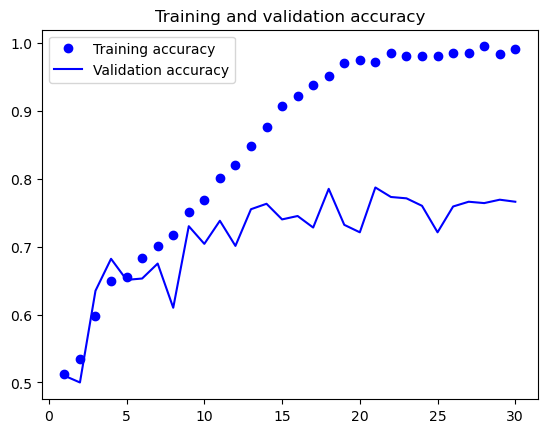

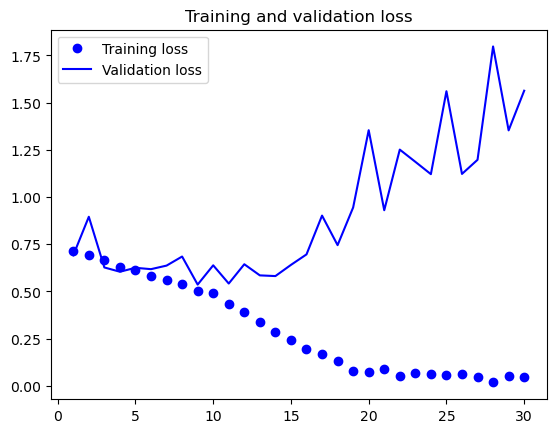

In [29]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()